Found 1398 images belonging to 7 classes.
Found 349 images belonging to 7 classes.
Found 697 images belonging to 7 classes.


C:\Users\Acer\new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Acer\new\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 397ms/step - accuracy: 0.1496 - loss: 2.0245 - val_accuracy: 0.2894 - val_loss: 1.8057
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - accuracy: 0.3116 - loss: 1.7511 - val_accuracy: 0.3840 - val_loss: 1.7351
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 356ms/step - accuracy: 0.4484 - loss: 1.5085 - val_accuracy: 0.4241 - val_loss: 1.6203
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 358ms/step - accuracy: 0.5899 - loss: 1.2257 - val_accuracy: 0.4470 - val_loss: 1.8246
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 359ms/step - accuracy: 0.6351 - loss: 1.0837 - val_accuracy: 0.4613 - val_loss: 1.8133
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 374ms/step - accuracy: 0.7604 - loss: 0.7519 - val_accuracy: 0.4269 - val_loss: 2.0293
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 370ms/step - accuracy: 0.8154 - loss: 0.5855 - val_accuracy: 0.4040 - val_loss: 2.4146
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 366ms/step - accuracy: 0.8700 - loss: 0.3798 - val_accuracy: 0.404

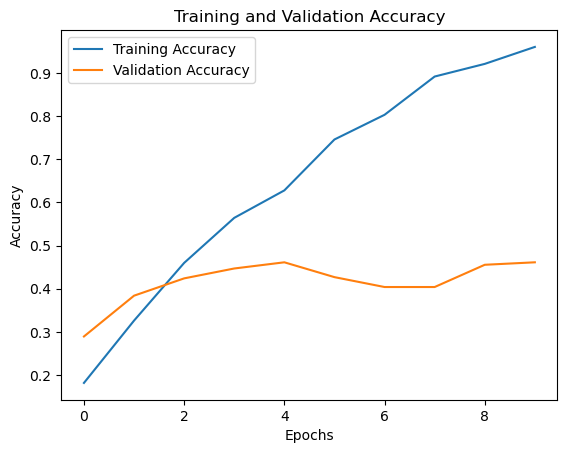

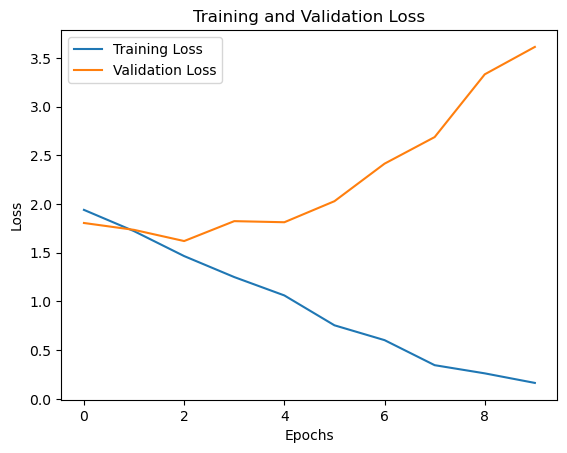

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step


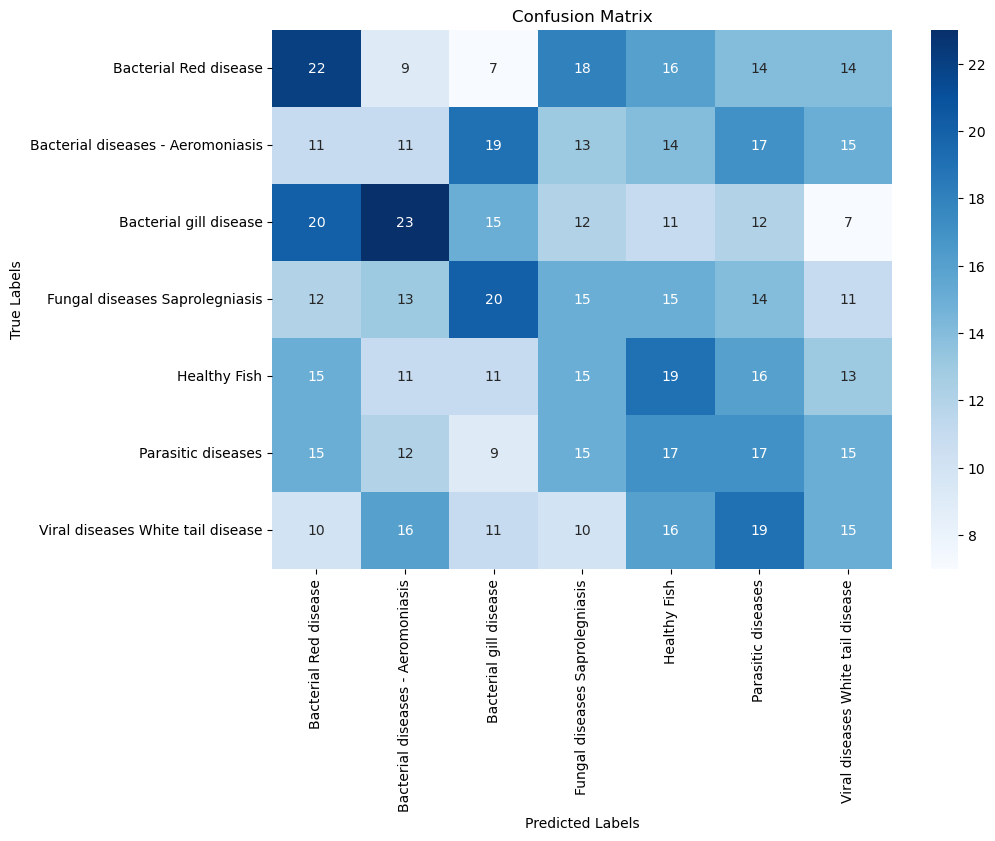

In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define paths to train and test datasets
train_dir = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\Train"
test_dir = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\Test"

# Set image dimensions and batch size
img_height = 150
img_width = 150
batch_size = 32

# Set up ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Use rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data from directories (80% training, 20% validation)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 80% for training
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 20% for validation
)

# Load test data from directories
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # num_classes = number of categories (diseases)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save("fish_disease_classifier.h5")

# Get predictions from the model
test_pred = model.predict(test_generator)
test_pred = np.argmax(test_pred, axis=1)  # Convert probabilities to class labels

# True labels from the test generator
test_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(test_true, test_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


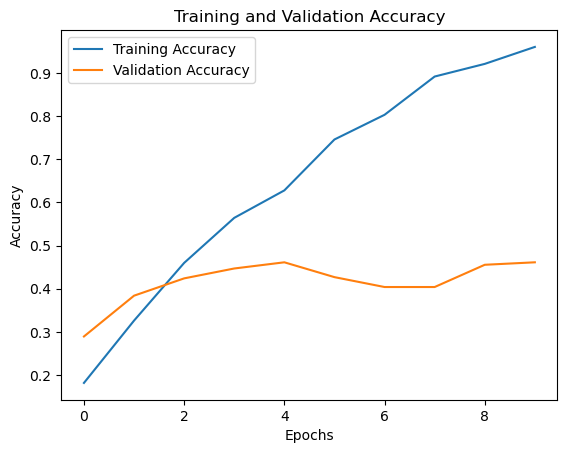

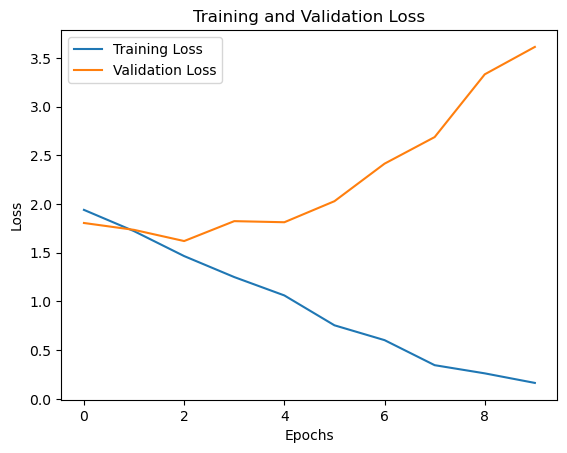

In [244]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


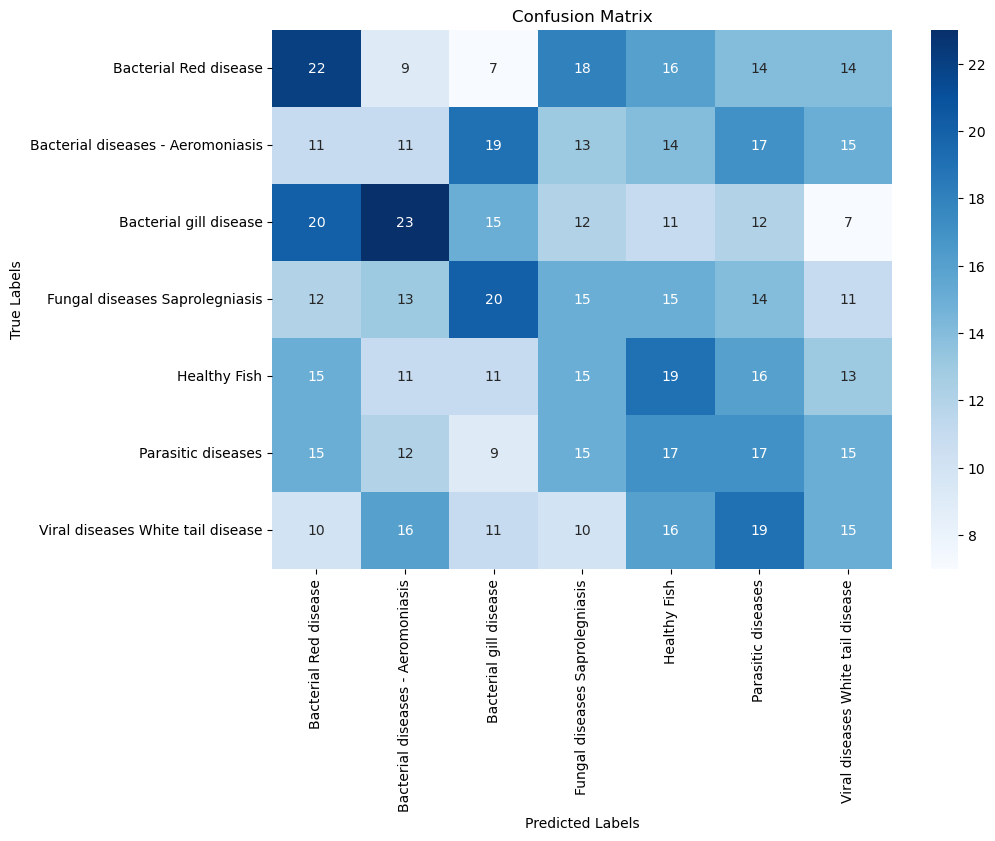

In [242]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
model.save("fish_disease_classifier.h5")


In [60]:
model.save('fish_disease_model.h5')  # Save model in HDF5 format


In [62]:
model.save('fish_disease_model.keras')  # Save the model in the native Keras format


In [200]:
model = tf.keras.models.load_model(r'C:/Users/Acer/Documents/JupyterNotebooks/fish_disease_classifier.h5')


In [204]:
model.save('fish_disease_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


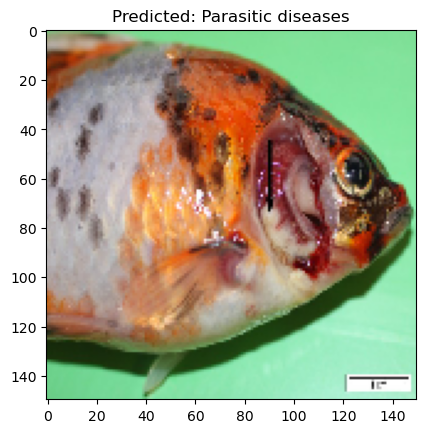

Predicted class: Parasitic diseases


In [88]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new3.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


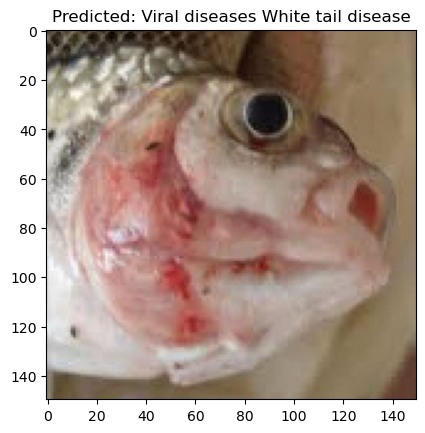

Predicted class: Viral diseases White tail disease


In [90]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new4.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


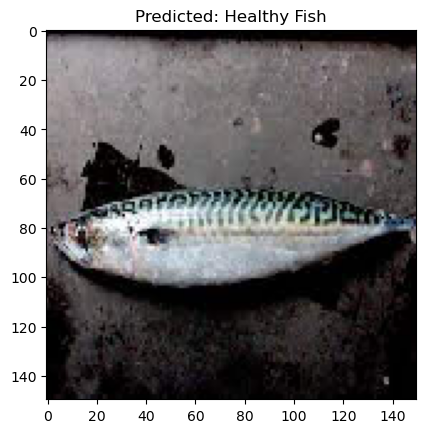

Predicted class: Healthy Fish


In [96]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new6.jpeg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


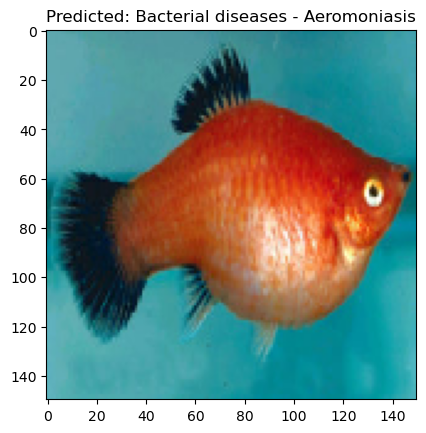

Predicted class: Bacterial diseases - Aeromoniasis


In [218]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new13.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


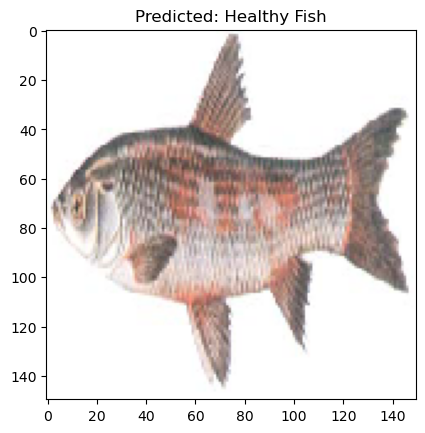

Predicted class: Healthy Fish


In [100]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new8.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


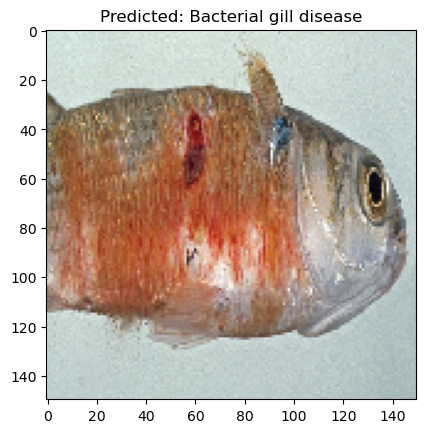

Predicted class: Bacterial gill disease


In [226]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new18.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


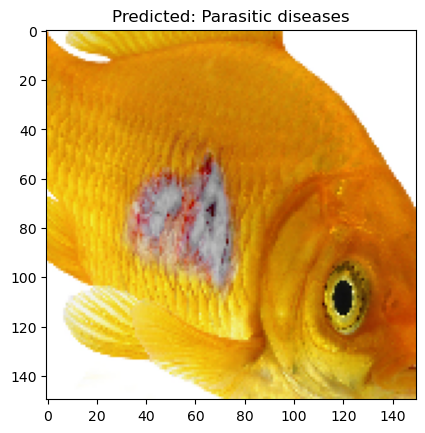

Predicted class: Parasitic diseases


In [130]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new9.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


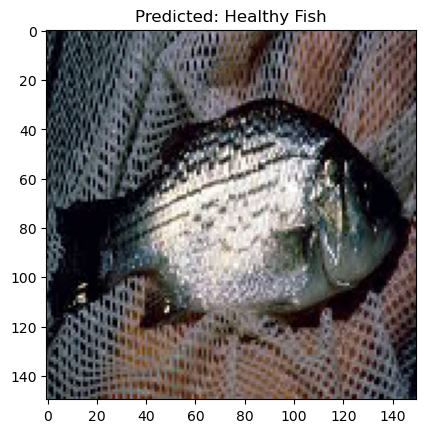

Predicted class: Healthy Fish


In [132]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new11.jpeg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


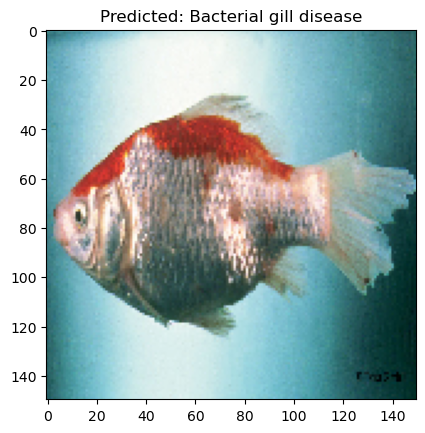

Predicted class: Bacterial gill disease


In [136]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new12.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5') 

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


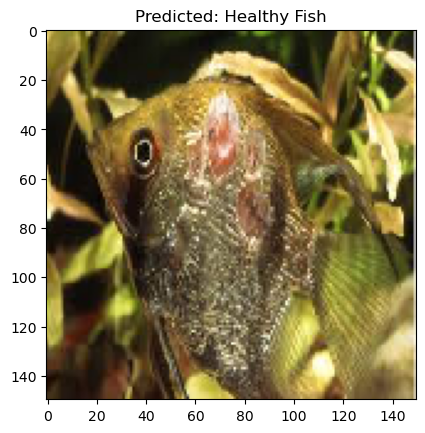

Predicted class: Healthy Fish


In [210]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new5.jpeg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model
model = tf.keras.models.load_model('fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


In [198]:
model = tf.keras.models.load_model(r'C:/Users/Acer/Documents/JupyterNotebooks/fish_disease_classifier.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


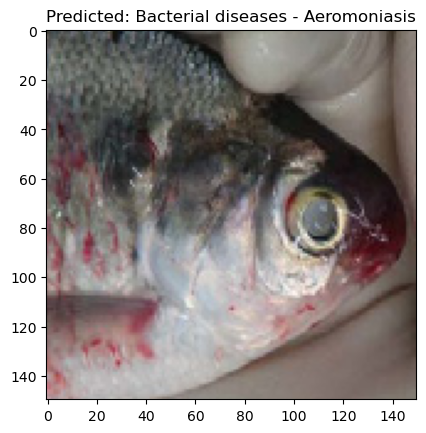

Predicted class: Bacterial diseases - Aeromoniasis


In [214]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the image to be predicted (replace with your actual image file name)
img_path = r"C:\Users\Acer\Desktop\archive (9)\Freshwater Fish Disease Aquaculture in south asia\NEW Image\new16.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(150, 150))  # Resize to the input shape of the model
img_array = image.img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Load the trained model using the correct file path
model = tf.keras.models.load_model(r'C:\Users\Acer\fish_disease_classifier.h5')

# Predict the class of the image
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the class label names (you may need to adjust this depending on how your model is trained)
class_labels = list(train_generator.class_indices.keys())

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class[0]]}")
plt.show()

# Print the prediction
print(f"Predicted class: {class_labels[predicted_class[0]]}")


In [192]:
model = tf.keras.models.load_model('C:/Users/Acer/Documents/JupyterNotebooks/fish_disease_classifier.h5')


In [194]:
import os
os.path.exists('C:/Users/Acer/Documents/JupyterNotebooks/fish_disease_classifier.h5')


True

In [146]:
model.save("complete_model.h5")  # Saves architecture + weights


In [104]:
import pickle

In [126]:
import pickle
from tensorflow.keras.models import model_from_json

# Save the model architecture as a JSON file
model_json = model.to_json()
with open("fish_disease_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the weights with the correct filename ending (.weights.h5)
model.save_weights("fish_disease_model_weights.weights.h5")

# To pickle the architecture and weights together, load them later for reconstruction:
model_data = {
    "model_json": model_json,
    "model_weights": "fish_disease_model_weights.weights.h5"
}

# Serialize the dictionary to pickle file
with open("fish_disease_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved as pickle file!")


Model saved as pickle file!


In [120]:
import pickle
from tensorflow.keras.models import model_from_json

# Load the pickle file
with open("fish_disease_model.pkl", "rb") as f:
    model_data = pickle.load(f)

# Load the model architecture from JSON
model_json = model_data['model_json']
model = model_from_json(model_json)

# Load the model weights
model.load_weights(model_data['model_weights'])

# Now, the model is ready to use
print("Model loaded successfully!")


Model loaded successfully!


C:\Users\Acer\new\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [122]:
import os

file_path = "fish_disease_model.pkl"  # Replace with your file name
if os.path.exists(file_path):
    print(f"File is located at: {os.path.abspath(file_path)}")
else:
    print("File not found!")


File is located at: C:\Users\Acer\fish_disease_model.pkl


In [150]:
# Assuming `model` is the trained model

# Save the model as a .h5 file
model.save("fish_disease_classifier.h5")

print("Model saved as .h5 file!")


Model saved as .h5 file!


In [152]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("fish_disease_classifier.h5")

print("Model loaded successfully from .h5 file!")


Model loaded successfully from .h5 file!


In [154]:
import os
print(os.getcwd())


C:\Users\Acer


In [162]:
import os

# Check if the file exists in the current directory
os.path.exists("fish_disease_classifier.h5")


False

In [164]:
# Save the model
model.save("fish_disease_classifier.h5")


In [166]:
os.path.exists("fish_disease_classifier.h5")


True

In [168]:
import shutil

# Move the .h5 file to your desktop
shutil.move("fish_disease_classifier.h5", "C:/Users/Acer/Desktop/fish_disease_classifier.h5")


'C:/Users/Acer/Desktop/fish_disease_classifier.h5'

In [170]:
from IPython.display import FileLink

# Provide the path to the file you want to download
file_path = "C:/Users/Acer/Desktop/fish_disease_classifier.h5"

# Create a download link
FileLink(file_path)


C:\Users\Acer\Desktop\fish_disease_classifier.h5

In [174]:
from IPython.display import display, HTML

# Path to the file you want to download
file_path = "/path_to_jupyter_notebooks/fish_disease_classifier.h5"

# Generate a download link
display(HTML(f'<a href="/files/{file_path}" download>Click here to download the file</a>'))


In [182]:
import os
import shutil

# Paths
source_path = r"C:/Users/Acer/Desktop/fish_disease_classifier.h5"  # The source file path
destination_folder = r"C:/Users/Acer/Documents/JupyterNotebooks"  # Folder where file should be copied
destination_path = os.path.join(destination_folder, "fish_disease_classifier.h5")  # Full path for the destination file

# Create the destination folder if it does not exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Check if the source file exists and copy it     
if os.path.exists(source_path):
    shutil.copy(source_path, destination_path)
    print(f"File copied to: {destination_path}")
else:
    print("Source file does not exist.")


File copied to: C:/Users/Acer/Documents/JupyterNotebooks\fish_disease_classifier.h5


In [184]:
from IPython.display import display, HTML

# Generate the download link
display(HTML('<a href="file:///C:/Users/Acer/Documents/JupyterNotebooks/fish_disease_classifier.h5" download>Click here to download the model</a>'))
